In [184]:
from collections import namedtuple
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from tqdm import tqdm

import pulp

import scipy.spatial as sc

import hyperparameters
from plot_solution_file import plot_solution

In [185]:
file_location = "data/fl_100_1"

with open(file_location, 'r') as input_data_file:
    input_data = input_data_file.read()  # input_data is a string at this instance.

lines = input_data.split('\n')

parts = lines[0].split()
facility_count = int(parts[0])  # number of facilities
print(facility_count)
customer_count = int(parts[1])  # number of customers
print(customer_count)

# Genero df con mis facilities y mnis customers
facilities = pd.DataFrame(columns=['setup_cost', 'capacity', 'x', 'y'])
for i in range(1, facility_count + 1):
    parts = lines[i].split()
    facilities.loc[i - 1] = parts
facilities = facilities.astype({'setup_cost':float, 'capacity':int, 'x':float, 'y':float})
print('done facilities')
customers = pd.DataFrame(columns=['demand', 'x', 'y'])
for i in range(facility_count + 1, facility_count + 1 + customer_count):
    parts = lines[i].split()
    customers.loc[i - 1 - facility_count] = parts
customers = customers.astype({'demand':int, 'x':float, 'y':float})
print('done customers')

array_x_y = pd.concat([facilities.loc[:,['x','y']], customers.loc[:,['x','y']]])

distances = sc.distance.squareform(sc.distance.pdist(array_x_y))
distances_facilities = distances[0:facility_count, 0:facility_count]
distances_customers = distances[facility_count:, facility_count:]
distances_facilities_customers = distances[facility_count:, :facility_count]  # Customer in row, facility in column

ordered_distances_facilities = np.argsort(distances_facilities, axis=0)
ordered_distances_customers = np.argsort(distances_customers, axis=0)
ordered_rowfacility_distances_facilities_customers = np.argsort(distances_facilities_customers, axis=0)
ordered_rowcustomer_distances_facilities_customers = np.argsort(distances_facilities_customers, axis=1)

x = pd.DataFrame(np.zeros((customer_count, facility_count), dtype='int'))  # df para las decition variables

f = pd.DataFrame(np.zeros(facility_count, dtype='int'), columns=['facility_open'])
f = f.join(facilities.loc[:,'capacity'])
f.facility_open = 1

100
1000
done facilities
done customers


In [186]:
x

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [187]:
facilities

,setup_cost,capacity,x,y
0,2141200.0,8000,65033.169756,65033.169756
1,2107403.0,8000,83718.417816,84711.905780
2,1840969.0,8000,60930.988032,109445.313546
3,2217151.0,8000,79127.643466,117468.244424
4,2164343.0,8000,91917.231873,59030.552970
...,...,...,...,...
95,2122850.0,8000,92758.111550,98890.664372
96,1777909.0,8000,93546.775558,72798.549356
97,2106843.0,8000,95783.099852,88333.603129
98,2095496.0,8000,97887.700245,80524.466754


In [188]:
distances_facilities_customers

array([[32900.21177393, 24080.52005202, 57621.30557547, ...,
        23159.53779538, 15250.51030456, 37565.36088715],
       [55376.76716251, 28520.2260618 , 46910.34509131, ...,
        17023.22194414, 22504.00226185, 39917.22615425],
       [18757.70358634,  9861.87960161, 39451.26708009, ...,
        19907.64254031, 17939.45506771, 18187.40289062],
       ...,
       [21901.21217522,  6600.59381439, 30949.7916006 , ...,
        19190.10490226, 20759.33112492, 10276.12896089],
       [58758.76026664, 32449.5304959 , 52557.96903385, ...,
        20199.93554706, 24054.93675556, 44805.24015791],
       [23025.52225612,  6131.56885052, 30144.92008073, ...,
        18620.22359478, 20642.18008904,  9907.56373249]])

In [189]:
ordered_rowcustomer_distances_facilities_customers

array([[28, 73,  4, ..., 56, 87,  7],
       [91, 78, 89, ..., 21, 83, 34],
       [64, 32, 14, ..., 66, 87,  7],
       ...,
       [51, 37, 90, ..., 48,  7, 27],
       [91, 78,  9, ..., 38, 83, 34],
       [37, 51, 90, ..., 48,  7, 27]], dtype=int64)

In [190]:
ordered_rowfacility_distances_facilities_customers

array([[181, 669, 270, ..., 328, 590, 370],
       [405, 709, 481, ..., 227, 346, 774],
       [490, 876, 362, ..., 555, 715, 968],
       ...,
       [103, 826, 138, ..., 826, 287, 494],
       [511, 854, 933, ..., 854, 854, 933],
       [494, 284, 660, ..., 284, 284, 660]], dtype=int64)

,setup_cost,capacity,x,y,eficiency,cumulative_cap_ef
0,2141200.0,8000,65033.169756,65033.169756,0.001861,776000
1,2107403.0,8000,83718.417816,84711.905780,0.002132,440000
2,1840969.0,8000,60930.988032,109445.313546,0.002168,384000
3,2217151.0,8000,79127.643466,117468.244424,0.001882,752000
4,2164343.0,8000,91917.231873,59030.552970,0.002065,536000
...,...,...,...,...,...,...
95,2122850.0,8000,92758.111550,98890.664372,0.001955,680000
96,1777909.0,8000,93546.775558,72798.549356,0.002181,368000
97,2106843.0,8000,95783.099852,88333.603129,0.001982,632000
98,2095496.0,8000,97887.700245,80524.466754,0.001984,624000


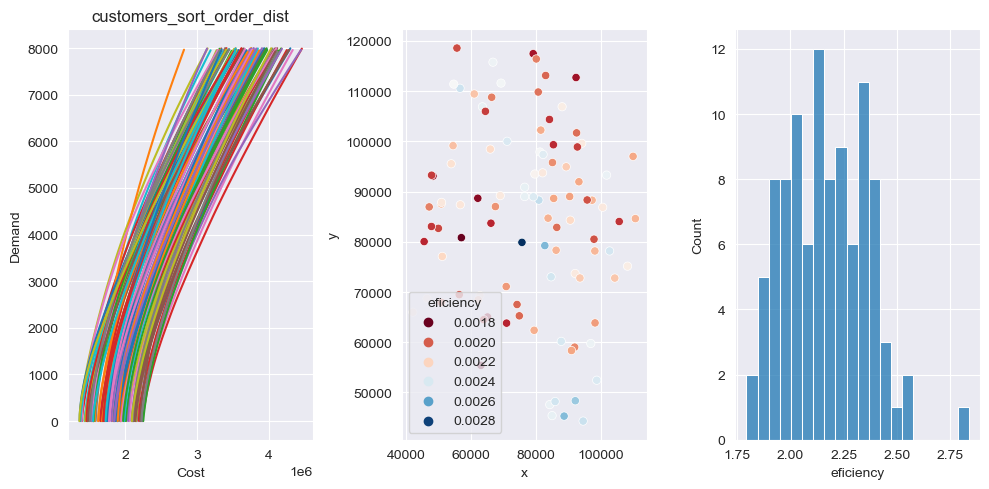

In [197]:
facility_n = 0

fig, ax = plt.subplots(1,3,figsize=(10,5))


ax[0].set_title("customers_sort_order_dist")

for facility_n in range(facility_count):

    facility_capacity = facilities.loc[facility_n,"capacity"] * 1

    customers_sort_order_dist = ordered_rowfacility_distances_facilities_customers[:,facility_n]

    customers_distances = distances_facilities_customers[:,facility_n]

    customers_demands = customers.loc[:,"demand"].values

    customers_demand_cost = customers_demands/customers_distances

    customers_sort_order_demand_cost = np.argsort(customers_demand_cost)[::-1]

    cost_array = np.array(facilities.loc[facility_n,"setup_cost"])
    cost_array = np.append(arr=cost_array, values=customers_distances[customers_sort_order_demand_cost]).cumsum()
    demand_array = np.array(0)
    demand_array = np.append(arr=demand_array, values=customers_demands[customers_sort_order_demand_cost]).cumsum()

    demand_mask = demand_array <= facility_capacity

    demand_array = demand_array[demand_mask]
    cost_array = cost_array[demand_mask]

    facilities.loc[facility_n,"eficiency"] = facilities.loc[facility_n, "capacity"] / cost_array[-1]

    facilities_use_mask = facilities.loc[:,"eficiency"]

    ax[0].set_xlabel("Cost")
    ax[0].set_ylabel("Demand")

    sns.lineplot(x=cost_array, y=demand_array, ax=ax[0])
sns.scatterplot(data=facilities, x="x", y="y", hue="eficiency", ax=ax[1], palette='RdBu')
sns.histplot(x=facilities.eficiency * 1000, ax=ax[2], bins=20)
plt.tight_layout()

facilities.sort_values(by='eficiency', ascending=False, inplace=True)  # Order facilities by eficiency.
facilities.loc[:,'cumulative_cap_ef'] = np.cumsum(facilities.loc[:,'capacity'])  # Generate a cumulative column.
capacity_req = customers.demand.sum() * 1.2  # Define a required capacity bigger than actual capacity requirement.
facilities_ef_mask = facilities.cumulative_cap_ef < capacity_req  # Generate a mask of facilities selected by efficiency. Its a series.
facilities_ef_mask.sort_index(inplace=True)
facilities.sort_index(inplace=True)
available_facilities = pd.Series(range(facility_count))[facilities_ef_mask].values
mask_open_facilities_pulp = facilities_ef_mask

facilities

In [168]:
facilities_ef_mask.sort_index()

51     True
64     True
48     True
29     True
8      True
      ...  
75    False
0     False
6     False
24    False
13    False
Name: cumulative_cap_ef, Length: 100, dtype: bool

In [171]:
pd.Series(range(facility_count))[facilities_ef_mask].values

array([ 8, 27, 29, 48, 51, 56, 64], dtype=int64)

In [153]:
facilities.sort_values(by='eficiency', ascending=False, inplace=True)
facilities.loc[:,'cumulative_cap_ef'] = np.cumsum(facilities.loc[:,'capacity'])
capacity_req = customers.demand.sum() * 1.2
facilities_ef_mask = facilities.cumulative_cap_ef < capacity_req
facilities

,setup_cost,capacity,x,y,eficiency,cumulative_cap_ef
51,1578148.0,8000,75656.039762,79891.274654,0.002836,8000
64,1529233.0,8000,82712.982724,79247.352647,0.002547,16000
48,1374042.0,8000,88662.747555,45297.351524,0.002541,24000
29,1479013.0,8000,92121.207343,48359.403786,0.002508,32000
8,1669402.0,8000,80869.900369,88301.311834,0.002444,40000
...,...,...,...,...,...,...
75,2143143.0,8000,48206.909474,93096.294803,0.001868,768000
0,2141200.0,8000,65033.169756,65033.169756,0.001861,776000
6,2223692.0,8000,62035.453190,88676.328787,0.001847,784000
24,2237235.0,8000,62994.321209,55405.040315,0.001798,792000


In [155]:
customers.demand.sum()

50886

In [143]:
np.quantile(np.arange(0,101), q=0.8)

80.0

In [144]:
facilities

,setup_cost,capacity,x,y,eficiency
0,2141200.0,8000,65033.169756,65033.169756,0.001861
1,2107403.0,8000,83718.417816,84711.905780,0.002132
2,1840969.0,8000,60930.988032,109445.313546,0.002168
3,2217151.0,8000,79127.643466,117468.244424,0.001882
4,2164343.0,8000,91917.231873,59030.552970,0.002065
...,...,...,...,...,...
95,2122850.0,8000,92758.111550,98890.664372,0.001955
96,1777909.0,8000,93546.775558,72798.549356,0.002181
97,2106843.0,8000,95783.099852,88333.603129,0.001982
98,2095496.0,8000,97887.700245,80524.466754,0.001984


In [112]:
np.append(arr=np.array([1,2,3]), values=[3,2])

array([1, 2, 3, 3, 2])

In [2]:
import pandas as pd
import numpy as np

In [4]:
np.random.choice(4)

3

In [8]:
hola=[1,2,3]
if hola:
    print(True)

True


In [ ]:
lines = input_data.split('\n')

    parts = lines[0].split()
    facility_count = int(parts[0])  # number of facilities
    print(facility_count)
    customer_count = int(parts[1])  # number of customers
    print(customer_count)

    # Genero df con mis facilities y mnis customers
    facilities = pd.DataFrame(columns=['setup_cost', 'capacity', 'x', 'y'])
    for i in range(1, facility_count + 1):
        parts = lines[i].split()
        facilities.loc[i - 1] = parts
    facilities = facilities.astype({'setup_cost':float, 'capacity':int, 'x':float, 'y':float})
    print('done facilities')
    customers = pd.DataFrame(columns=['demand', 'x', 'y'])
    for i in range(facility_count + 1, facility_count + 1 + customer_count):
        parts = lines[i].split()
        customers.loc[i - 1 - facility_count] = parts
    customers = customers.astype({'demand':int, 'x':float, 'y':float})
    print('done customers')

    array_x_y = pd.concat([facilities.loc[:,['x','y']], customers.loc[:,['x','y']]])

    distances = sc.distance.squareform(sc.distance.pdist(array_x_y))
    distances_facilities = distances[0:facility_count, 0:facility_count]
    distances_customers = distances[facility_count:, facility_count:]
    distances_facilities_customers = distances[facility_count:, :facility_count]  # Customer in row, facility in column

    ordered_distances_facilities = np.argsort(distances_facilities, axis=0)
    ordered_distances_customers = np.argsort(distances_customers, axis=0)
    # ordered_rowfacility_distances_facilities_customers = np.argsort(distances_facilities_customers, axis=1)
    ordered_rowcustomer_distances_facilities_customers = np.argsort(distances_facilities_customers, axis=1)

    x = pd.DataFrame(np.zeros((customer_count, facility_count), dtype='int'))  # df para las decition variables

    f = pd.DataFrame(np.zeros(facility_count, dtype='int'), columns=['facility_open'])
    f = f.join(facilities.loc[:,'capacity'])
    f.facility_open = 1

    for customer in range(customer_count):
        open_facilities = f.facility_open
        open_facilities_w_capacity_maks = (f.capacity > customers.loc[customer,'demand']) & open_facilities
        open_facilities_w_capacity_dist_ordered = ordered_rowcustomer_distances_facilities_customers[customer][open_facilities_w_capacity_maks[ordered_rowcustomer_distances_facilities_customers[customer]]]
        facility_to_be_asigned = open_facilities_w_capacity_dist_ordered[0]
        f.loc[facility_to_be_asigned, 'capacity'] -= customers.loc[customer, 'demand']
        x.loc[customer, facility_to_be_asigned] = 1

    # Close all facilities that are not occupied.
    mask_close_facilities = f.capacity == facilities.capacity
    f.loc[mask_close_facilities, 'facility_open'] = 0

    hue_array = (~mask_close_facilities).map({True:'Open', False:'Close'})
    facility_mean_capacity = facilities.loc[:,'capacity'].mean()
    facility_mean_setup_cost =  facilities.loc[:,'setup_cost'].mean()
    if facility_count <= 100 & customer_count <= 1000:
        facility_mean_capacity = 0
        facility_mean_setup_cost = 0
    elif facility_count == 1000 & customer_count == 1500:
        facility_mean_capacity = np.inf
        facility_mean_setup_cost = np.inf
    extra_facilities_mask = (facilities.loc[:,'capacity'] >= facility_mean_capacity) & (facilities.loc[:,'setup_cost'] <= facility_mean_setup_cost)
    extra_facilities_mask = extra_facilities_mask & mask_close_facilities
    hue_array[extra_facilities_mask] = 'New_open'
    # g = sns.jointplot(data=facilities, x='setup_cost', y='capacity', hue=hue_array)
    # plt.show()

    mask_open_facilities_pulp = ~mask_close_facilities | extra_facilities_mask

    # decition_variables_array = np.array([ i if isinstance(i,np.int32) else i.varValue for i in x.values.flatten()])
    # decition_variables_array = decition_variables_array.reshape((customer_count, facility_count))
    solution = list(x.values.argsort()[:, -1])
    print(f'Greedy solution:\n{solution}')
    plot_solution(facilities=facilities, customers=customers, solution=solution, extra='greedy')

    if customer_count >= 2000:
        obj = facilities.loc[~mask_close_facilities, 'setup_cost'].sum() + distances_facilities_customers[x.astype(bool)].sum()

        output_data = '%.2f' % obj + ' ' + str(0) + '\n'
        output_data += ' '.join(map(str, solution))
        return output_data

    # Paso a armar el solver con pulp

    prob = pulp.LpProblem(name='facility_location',  sense=pulp.const.LpMinimize)

    available_facilities = np.array(range(facility_count))[mask_open_facilities_pulp]

    for i in tqdm(range(customer_count)):
        for j in available_facilities:
            value = x.loc[i,j]
            x.loc[i,j] = pulp.LpVariable(name=f'Customer:{i}_,Facility:{j}', cat='Binary') #  mip_model.add_var(var_type=mip.BINARY)
            x.loc[i, j].setInitialValue(val=value)
    print('done setting customers')

    f.loc[mask_open_facilities_pulp,'facility_open'] = np.array([pulp.LpVariable(name=f'Facility:{i}', cat='Binary') for i in available_facilities])
    for i in f.loc[~mask_close_facilities,'facility_open']:
        i.setInitialValue(val=1)
    print('done setting facilities')

    for customer in tqdm(range(customer_count)):  # each customer is allocated to one facility only.
        prob += pulp.lpSum(x.loc[customer]) == 1
    print('done customers eq')

    for facility in tqdm(range(facility_count)):
        prob += pulp.lpSum(x.loc[:, facility] * customers.loc[:, 'demand']) <= facilities.loc[facility, 'capacity'] * f.loc[facility, 'facility_open']
    print('done facilities eq')

    prob += pulp.lpSum((distances_facilities_customers * x).values) + pulp.lpSum((facilities.loc[:,'setup_cost'] * f.loc[:, 'facility_open'].T).values)

    prob.solve(pulp.PULP_CBC_CMD(msg=1, timeLimit=60*60, warmStart=True))#, warmStart=True)

    status = pulp.LpStatus[prob.status]
    print(status)

    decition_variables_array = np.array([i if isinstance(i, int) else i.varValue for i in x.values.flatten()])
    decition_variables_array = decition_variables_array.reshape((customer_count, facility_count))
    solution = list(decition_variables_array.argsort()[:, -1])

    plot_solution(facilities=facilities, customers=customers, solution=solution, extra='MIP')

    obj = pulp.value(prob.objective)  # mip_model.objective_value

    output_data = '%.2f' % obj + ' ' + str(0) + '\n'
    output_data += ' '.join(map(str, solution))


    # Linea para cuando no uso pulp
    # obj = facilities.loc[~mask_close_facilities, 'setup_cost'].sum() + distances_facilities_customers[x.astype(bool)].sum()
    #
    # output_data = '%.2f' % obj + ' ' + str(0) + '\n'
    # output_data += ' '.join(map(str, solution))


In [18]:
df = {'customers':[50, 200, 100, 1000, 800, 500, 1000, 2000],
        'facilities':[25, 50, 100, 100, 200, 3000, 1500, 2000],
        'objective_threshold':[3269821.32053,
                               3732793.43377,
                               1965.55449699,
                               22724634,
                               4711295,
                               30000000,
                               10000000,
                               10000000],
        'search_till_opt': [True, True, True, False, False, False, False, False],
        'solve_full': [False, False, False, True, False, False, False, False]}

In [19]:
df = pd.DataFrame(df).set_index(keys=['customers', 'facilities'])

In [32]:
from hyperparameters import hellow

hellow()

hellow


In [33]:
from hyperparameters import df_hyperparameters

df_hyperparameters

,,objective_threshold,search_till_opt,solve_full
customers,facilities,,,
50,25,3.269821e+06,True,False
200,50,3.732793e+06,True,False
100,100,1.965554e+03,True,False
1000,100,2.272463e+07,False,True
800,200,4.711295e+06,False,False
500,3000,3.000000e+07,False,False
1000,1500,1.000000e+07,False,False
2000,2000,1.000000e+07,False,False


In [36]:
np.random.choice(range(1,9))

TypeError: choice() got an unexpected keyword argument 'seed'

In [21]:
df.loc[50,25]

objective_threshold    3269821.32053
search_till_opt                 True
solve_full                     False
Name: (50, 25), dtype: object